# Housing Investment: Regression Model for Housing Price to predict good investment opportunity
## Problem Statement:
The company wants to know:
- 	Which variables are significant in predicting the price of a house, an
- •	How well those variables describe the price of a hous

## Exploratory Data Evaluation
- Data Cleaning (Handling missing value, Remove duplicate data, Address data quality issue
- Handle categorical variables
- Perform data anlytics using histogram, heatplots, boxplots

## Model Building using Regression Model

## Model Evaluationing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Read data

In [4]:
df = pd.read_csv('./train.csv')

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
df.shape

(1460, 81)

### Data Cleaning

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
cols = list(df.columns)

### Cleaning columns in dataset

In [9]:
df.isna().sum().sort_values(ascending=False)/1460

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

**Drop columns 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType' as significantly high "NA"**

In [10]:
df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType'], index=1, inplace=True)

In [11]:
cols_na = df.columns[df.isna().any()].to_list()

In [12]:
df[cols_na].isna().sum()

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [13]:
# %g NA on 'LotFrontage','FireplaceQu' columns
259/1460*100, 690/1460*100

(17.73972602739726, 47.26027397260274)

**Drop columns 'LotFrontage','FireplaceQu' as significantly high "NA" 259, 690 respectively**

In [14]:
df.drop(columns=['LotFrontage','FireplaceQu'], axis=1, inplace=True)

In [15]:
# Drop rows with GarageType as 81/1460 rows are "NA" 
df = df[~df['GarageType'].isna()]

In [16]:
df.isna().sum().sort_values(ascending=False)

BsmtFinType2    31
BsmtExposure    31
BsmtFinType1    30
BsmtQual        30
BsmtCond        30
                ..
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
MSSubClass       0
SalePrice        0
Length: 74, dtype: int64

In [17]:
# Drop rows with BsmtFinType2 as 31 / 1379
df = df[~df['BsmtFinType2'].isna()]

In [18]:
df.shape

(1347, 74)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1347 non-null   int64  
 1   MSSubClass     1347 non-null   int64  
 2   MSZoning       1347 non-null   object 
 3   LotArea        1347 non-null   int64  
 4   Street         1347 non-null   object 
 5   LotShape       1347 non-null   object 
 6   LandContour    1347 non-null   object 
 7   Utilities      1347 non-null   object 
 8   LotConfig      1347 non-null   object 
 9   LandSlope      1347 non-null   object 
 10  Neighborhood   1347 non-null   object 
 11  Condition1     1347 non-null   object 
 12  Condition2     1347 non-null   object 
 13  BldgType       1347 non-null   object 
 14  HouseStyle     1347 non-null   object 
 15  OverallQual    1347 non-null   int64  
 16  OverallCond    1347 non-null   int64  
 17  YearBuilt      1347 non-null   int64  
 18  YearRemodAdd 

In [20]:
# Drop rows from dataset where MasVnrArea is NA
df = df[~df['MasVnrArea'].isna()]

In [21]:
# Drop rows from dataset where BsmtExposure is NA
df = df[~df['BsmtExposure'].isna()]


In [22]:
# Drop rows from dataset where Electrical is NA
df = df[~df['Electrical'].isna()]

In [23]:
#df.isna().sum().sort_values(ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1337 non-null   int64  
 1   MSSubClass     1337 non-null   int64  
 2   MSZoning       1337 non-null   object 
 3   LotArea        1337 non-null   int64  
 4   Street         1337 non-null   object 
 5   LotShape       1337 non-null   object 
 6   LandContour    1337 non-null   object 
 7   Utilities      1337 non-null   object 
 8   LotConfig      1337 non-null   object 
 9   LandSlope      1337 non-null   object 
 10  Neighborhood   1337 non-null   object 
 11  Condition1     1337 non-null   object 
 12  Condition2     1337 non-null   object 
 13  BldgType       1337 non-null   object 
 14  HouseStyle     1337 non-null   object 
 15  OverallQual    1337 non-null   int64  
 16  OverallCond    1337 non-null   int64  
 17  YearBuilt      1337 non-null   int64  
 18  YearRemodAdd 

In [24]:
df.isna().sum().sort_values(ascending=False)

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
ExterQual       0
MasVnrArea      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 74, dtype: int64

#### No NA remain in the data set

In [25]:
#Drop "Id" as index columns
df.drop(columns='Id', inplace=True, axis=1)

In [26]:
df.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   
5          50       RL    14115   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   
5    Inside       Gtl      Mitchel  ...             0       320           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2008        WD        Normal    208500  
2        0        0       9    2008        WD        Normal    223500  
3        0        0       2    2006        WD       Abnorml    140000  
4        0        0      12    2008        WD        Normal    250000  
5        0      700      10    2009        WD        Normal    143000  

[5 rows x 73 columns]

In [27]:
df['LandSlope'].value_counts().shape[0]

3

In [28]:
[column_name for column_name in df.columns if df[column_name].value_counts().shape[0] == 1]

[]

### No column with only 1 value

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1337 non-null   int64  
 1   MSZoning       1337 non-null   object 
 2   LotArea        1337 non-null   int64  
 3   Street         1337 non-null   object 
 4   LotShape       1337 non-null   object 
 5   LandContour    1337 non-null   object 
 6   Utilities      1337 non-null   object 
 7   LotConfig      1337 non-null   object 
 8   LandSlope      1337 non-null   object 
 9   Neighborhood   1337 non-null   object 
 10  Condition1     1337 non-null   object 
 11  Condition2     1337 non-null   object 
 12  BldgType       1337 non-null   object 
 13  HouseStyle     1337 non-null   object 
 14  OverallQual    1337 non-null   int64  
 15  OverallCond    1337 non-null   int64  
 16  YearBuilt      1337 non-null   int64  
 17  YearRemodAdd   1337 non-null   int64  
 18  RoofStyle    

### Handle categorical features

In [30]:
df['BsmtFullBath'].value_counts()

BsmtFullBath
0    763
1    561
2     13
Name: count, dtype: int64

In [31]:
df['SaleCondition'].dtype == 'int64'

False

In [32]:
#Get numeric_cols and categorical_cols
numeric_cols = []
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

In [33]:
len(df.columns), len(numeric_cols), len(categorical_cols)

(73, 36, 37)

## Handle Categorical variables by creating dummies with drop_first = True

In [34]:
df[categorical_cols] = df[categorical_cols].astype('category')

In [35]:
df = pd.get_dummies(df, drop_first=True, dtype='int32')

In [36]:
df.shape

(1337, 224)

In [37]:
df.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   
5          50    14115            5            5       1993          1995   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0       196.0         706           0        150  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   
5         0.0         732           0         64  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   
5               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   
5                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  
5                     1                      0  

[5 rows x 224 columns]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1459
Columns: 224 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int32(188), int64(34)
memory usage: 1.3 MB


## Correlation Matrix for numerical features

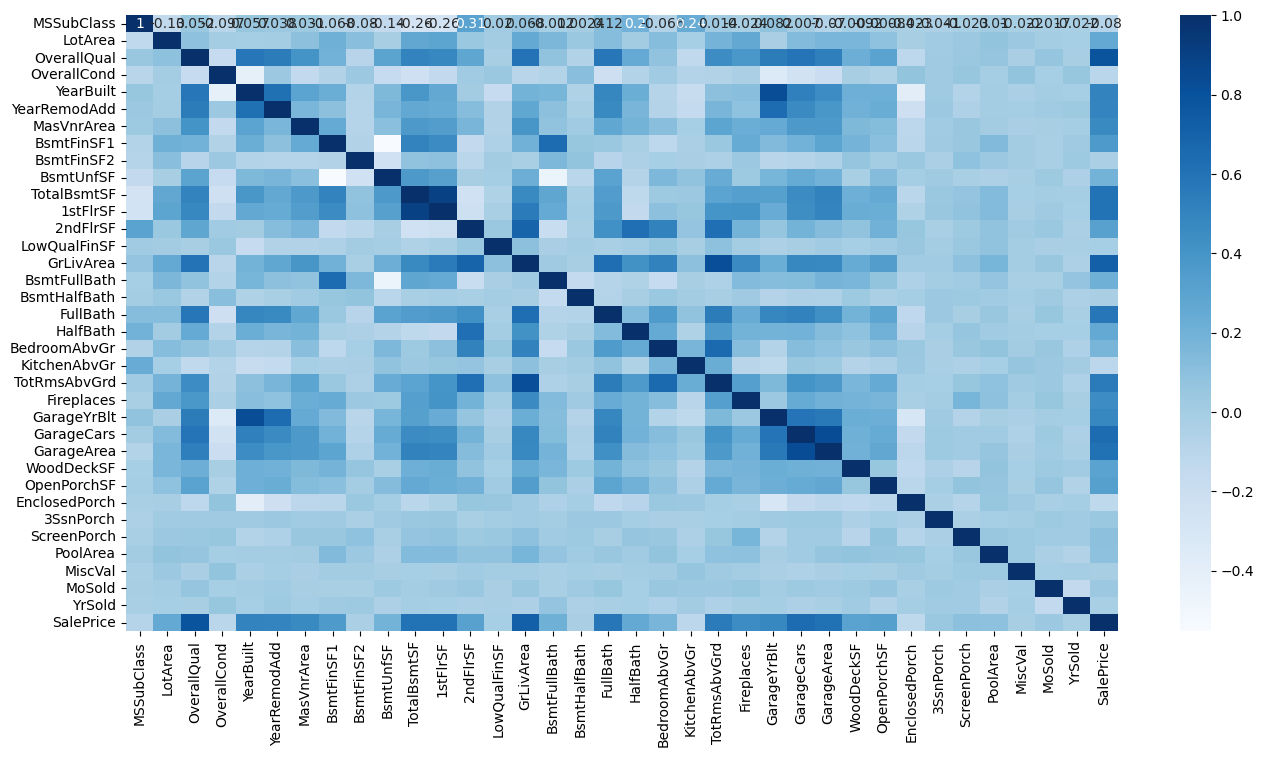

In [39]:
plt.figure(figsize=(16,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues')
plt.show()

### Get correlation between Garage parameters as observed from the heatplot above

In [40]:
df[['GarageYrBlt','GarageCars','GarageArea']].corr()

GarageYrBlt  GarageCars  GarageArea
GarageYrBlt     1.000000    0.590328    0.563856
GarageCars      0.590328    1.000000    0.832227
GarageArea      0.563856    0.832227    1.000000

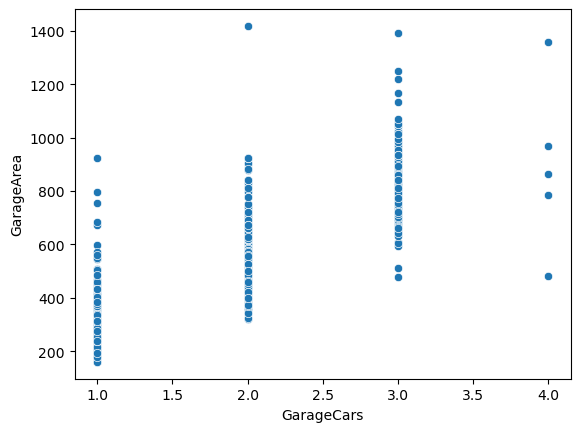

In [41]:
sns.scatterplot(data=df, y='GarageArea', x='GarageCars')
plt.show()

### Get correlation between 1stFloor SF and Total Basement SF from the heatplot above

In [42]:
df[['1stFlrSF','TotalBsmtSF']].corr()

1stFlrSF  TotalBsmtSF
1stFlrSF     1.000000     0.893114
TotalBsmtSF  0.893114     1.000000

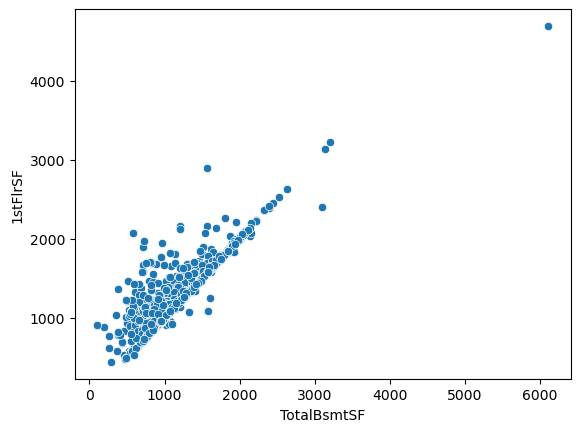

In [43]:
sns.scatterplot(data=df, x='TotalBsmtSF', y='1stFlrSF')
plt.show()

In [44]:
df.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   
5          50    14115            5            5       1993          1995   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0       196.0         706           0        150  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   
5         0.0         732           0         64  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   
5               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   
5                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  
5                     1                      0  

[5 rows x 224 columns]

In [45]:
df['YearBuilt'].value_counts()

YearBuilt
2005    64
2006    63
2004    53
2007    46
2003    42
        ..
1904     1
1912     1
1882     1
1917     1
1905     1
Name: count, Length: 109, dtype: int64

## Handle Outliers in dataset

In [46]:
df[numeric_cols].describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1337.000000    1337.000000  1337.000000  1337.000000  1337.000000   
mean     56.163052   10707.121915     6.219895     5.594615  1973.026926   
std      41.256160   10340.444570     1.324954     1.076519    29.574490   
min      20.000000    1300.000000     2.000000     2.000000  1880.000000   
25%      20.000000    7742.000000     5.000000     5.000000  1956.000000   
50%      50.000000    9600.000000     6.000000     5.000000  1976.000000   
75%      70.000000   11764.000000     7.000000     6.000000  2001.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1337.000000  1337.000000  1337.000000  1337.000000  1337.000000  ...   
mean    1985.676141   110.442782   463.850411    49.255049   582.718025  ...   
std       20.302333   185.649696   458.748645   166.253315   440.039321  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1968.000000     0.000000     0.000000     0.000000   248.000000  ...   
50%     1995.000000     0.000000   412.000000     0.000000   490.000000  ...   
75%     2004.000000   174.000000   733.000000     0.000000   816.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1337.000000  1337.000000    1337.000000  1337.000000  1337.000000   
mean     99.236350    47.818250      21.279731     3.588631    16.446522   
std     127.468933    65.373941      60.863948    30.235772    58.071570   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    28.000000       0.000000     0.000000     0.000000   
75%     173.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1337.000000   1337.000000  1337.000000  1337.000000    1337.000000  
mean      3.012715     42.964847     6.332835  2007.806283  186765.718025  
std      41.976957    508.245001     2.700201     1.331006   78943.244416  
min       0.000000      0.000000     1.000000  2006.000000   35311.000000  
25%       0.000000      0.000000     5.000000  2007.000000  135000.000000  
50%       0.000000      0.000000     6.000000  2008.000000  168500.000000  
75%       0.000000      0.000000     8.000000  2009.000000  220000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

In [47]:
numeric_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [48]:
len(numeric_cols)

36

### Observe boxplots for numerical variable for Outliers

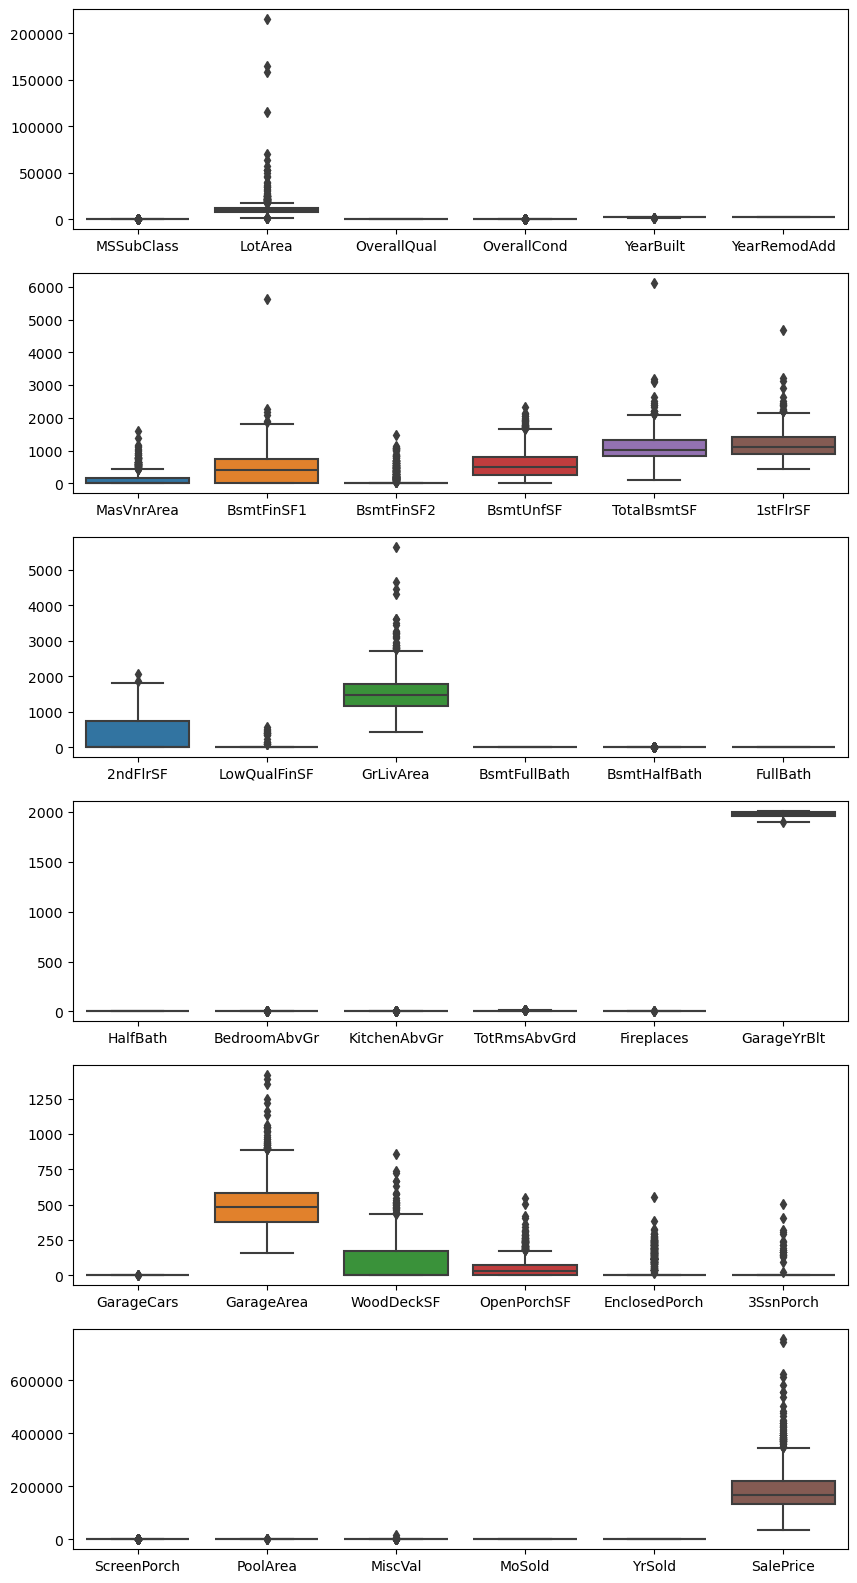

In [49]:
#Boxplot using 6 features in every figure
col_bins = int(len(numeric_cols)/6)
f, axs = plt.subplots(col_bins, figsize= (10,20))
for col in range(int(len(numeric_cols)/6)):
    #plt.figure(figsize=(10,10))
    start_col = col*6
    sns.boxplot(data=df[numeric_cols[start_col:start_col+6]], ax=axs[col])
    #plt.show()

## Below columns are showing outliers to process
SalePrice, EnclosedPorch, 3SsnPorch, GarageArea, WoodDeckSF, GrLivArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, LotArea

In [50]:
df[['SalePrice', 'EnclosedPorch', '3SsnPorch', 'GarageArea', 'WoodDeckSF', 'GrLivArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'LotArea']].describe()

SalePrice  EnclosedPorch    3SsnPorch   GarageArea   WoodDeckSF  \
count    1337.000000    1337.000000  1337.000000  1337.000000  1337.000000   
mean   186765.718025      21.279731     3.588631   501.480927    99.236350   
std     78943.244416      60.863948    30.235772   186.828301   127.468933   
min     35311.000000       0.000000     0.000000   160.000000     0.000000   
25%    135000.000000       0.000000     0.000000   377.000000     0.000000   
50%    168500.000000       0.000000     0.000000   484.000000     0.000000   
75%    220000.000000       0.000000     0.000000   583.000000   173.000000   
max    755000.000000     552.000000   508.000000  1418.000000   857.000000   

         GrLivArea   BsmtFinSF1  TotalBsmtSF     1stFlrSF        LotArea  
count  1337.000000  1337.000000  1337.000000  1337.000000    1337.000000  
mean   1537.791324   463.850411  1095.823485  1176.157816   10707.121915  
std     520.720129   458.748645   405.680730   386.782536   10340.444570  
min     438.000000     0.000000   105.000000   438.000000    1300.000000  
25%    1159.000000     0.000000   819.000000   894.000000    7742.000000  
50%    1481.000000   412.000000  1021.000000  1098.000000    9600.000000  
75%    1792.000000   733.000000  1324.000000  1414.000000   11764.000000  
max    5642.000000  5644.000000  6110.000000  4692.000000  215245.000000

In [51]:
df[df['LotArea']>25000].shape

(30, 224)

### Drop 30 outliers in LotArea

In [52]:
df = df[df['LotArea']<25000]

In [53]:
df[['SalePrice', 'EnclosedPorch', '3SsnPorch', 'GarageArea', 'WoodDeckSF', 'GrLivArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'LotArea']].describe()

SalePrice  EnclosedPorch    3SsnPorch   GarageArea   WoodDeckSF  \
count    1306.000000    1306.000000  1306.000000  1306.000000  1306.000000   
mean   185277.729709      21.238132     3.673813   498.039816    96.053599   
std     77274.540731      59.665125    30.587667   183.519872   122.578017   
min     35311.000000       0.000000     0.000000   160.000000     0.000000   
25%    135000.000000       0.000000     0.000000   368.000000     0.000000   
50%    167700.000000       0.000000     0.000000   484.000000     0.000000   
75%    217000.000000       0.000000     0.000000   578.000000   169.000000   
max    755000.000000     386.000000   508.000000  1390.000000   736.000000   

         GrLivArea   BsmtFinSF1  TotalBsmtSF     1stFlrSF       LotArea  
count  1306.000000  1306.000000  1306.000000  1306.000000   1306.000000  
mean   1523.930322   450.160031  1084.777948  1164.660031   9660.782542  
std     495.574628   429.111517   376.276247   369.283520   3642.949786  
min     438.000000     0.000000   105.000000   438.000000   1300.000000  
25%    1152.500000     0.000000   816.000000   892.000000   7662.750000  
50%    1475.500000   402.500000  1009.000000  1094.000000   9536.000000  
75%    1782.750000   719.750000  1309.750000  1391.750000  11509.000000  
max    4476.000000  2188.000000  3200.000000  3228.000000  24682.000000

In [54]:
df.shape[0]

1306

In [55]:
df[df['EnclosedPorch']==0].shape[0]/df.shape[0]

0.8621745788667687

In [56]:
df[df['3SsnPorch']==0].shape[0]/df.shape[0]

0.9823889739663093

In [57]:
df[df['WoodDeckSF']==0].shape[0]/df.shape[0]

0.5045941807044411

In [58]:
df[df['BsmtFinSF1']==0].shape[0]/df.shape[0]

0.29785604900459417

## Drop columns having high 0 values

In [59]:
df.drop(columns=['EnclosedPorch', '3SsnPorch', 'WoodDeckSF'], axis=1, inplace=True)

In [60]:
df[['SalePrice', 'GarageArea', 'GrLivArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'LotArea']].describe()

SalePrice   GarageArea    GrLivArea   BsmtFinSF1  TotalBsmtSF  \
count    1306.000000  1306.000000  1306.000000  1306.000000  1306.000000   
mean   185277.729709   498.039816  1523.930322   450.160031  1084.777948   
std     77274.540731   183.519872   495.574628   429.111517   376.276247   
min     35311.000000   160.000000   438.000000     0.000000   105.000000   
25%    135000.000000   368.000000  1152.500000     0.000000   816.000000   
50%    167700.000000   484.000000  1475.500000   402.500000  1009.000000   
75%    217000.000000   578.000000  1782.750000   719.750000  1309.750000   
max    755000.000000  1390.000000  4476.000000  2188.000000  3200.000000   

          1stFlrSF       LotArea  
count  1306.000000   1306.000000  
mean   1164.660031   9660.782542  
std     369.283520   3642.949786  
min     438.000000   1300.000000  
25%     892.000000   7662.750000  
50%    1094.000000   9536.000000  
75%    1391.750000  11509.000000  
max    3228.000000  24682.000000

In [61]:
df = df[df['BsmtFinSF1']!=0]

In [62]:
df.shape

(917, 221)

In [63]:
# Overwrite numeric_cols after dropping ['WoodDeckSF', 'EnclosedPorch', '3SsnPorch']
numeric_cols = [elem for elem in numeric_cols if elem not in ['WoodDeckSF', 'EnclosedPorch', '3SsnPorch']]

In [64]:
df[numeric_cols].describe()

MSSubClass       LotArea  OverallQual  OverallCond    YearBuilt  \
count  917.000000    917.000000   917.000000   917.000000   917.000000   
mean    55.343511   9687.093784     6.163577     5.623773  1974.957470   
std     42.086244   3601.817486     1.305624     1.053794    25.042264   
min     20.000000   1300.000000     2.000000     2.000000  1882.000000   
25%     20.000000   7728.000000     5.000000     5.000000  1959.000000   
50%     50.000000   9572.000000     6.000000     5.000000  1976.000000   
75%     70.000000  11616.000000     7.000000     6.000000  1999.000000   
max    190.000000  23595.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count    917.000000   917.000000   917.000000   917.000000   917.000000  ...   
mean    1985.076336   119.366412   641.122137    68.006543   413.222465  ...   
std       19.402332   186.320511   373.859319   190.793539   344.382697  ...   
min     1950.000000     0.000000     2.000000     0.000000     0.000000  ...   
25%     1969.000000     0.000000   375.000000     0.000000   173.000000  ...   
50%     1992.000000     0.000000   602.000000     0.000000   342.000000  ...   
75%     2003.000000   188.000000   854.000000     0.000000   549.000000  ...   
max     2010.000000  1600.000000  2188.000000  1474.000000  2336.000000  ...   

       GarageYrBlt  GarageCars   GarageArea  OpenPorchSF  ScreenPorch  \
count   917.000000  917.000000   917.000000   917.000000   917.000000   
mean   1978.741549    1.847328   498.801527    46.880044    18.019629   
std      22.202024    0.611593   174.457186    64.854782    60.304084   
min    1900.000000    1.000000   160.000000     0.000000     0.000000   
25%    1963.000000    1.000000   384.000000     0.000000     0.000000   
50%    1978.000000    2.000000   484.000000    26.000000     0.000000   
75%    1999.000000    2.000000   576.000000    72.000000     0.000000   
max    2010.000000    4.000000  1220.000000   547.000000   480.000000   

         PoolArea       MiscVal      MoSold       YrSold      SalePrice  
count  917.000000    917.000000  917.000000   917.000000     917.000000  
mean     2.505998     53.631407    6.281352  2007.856052  188873.737186  
std     38.008664    606.782631    2.684138     1.334379   79032.003760  
min      0.000000      0.000000    1.000000  2006.000000   35311.000000  
25%      0.000000      0.000000    5.000000  2007.000000  137000.000000  
50%      0.000000      0.000000    6.000000  2008.000000  167000.000000  
75%      0.000000      0.000000    8.000000  2009.000000  220000.000000  
max    648.000000  15500.000000   12.000000  2010.000000  755000.000000  

[8 rows x 33 columns]

In [65]:
for column in numeric_cols:
    val = df[df[column] == 0].shape[0]/df.shape[0]
    if val != 0:
        print(column,",",val)

MasVnrArea , 0.5256270447110142
BsmtFinSF2 , 0.8309705561613958
BsmtUnfSF , 0.07742639040348964
2ndFlrSF , 0.6314067611777535
LowQualFinSF , 0.9923664122137404
BsmtFullBath , 0.4154852780806979
BsmtHalfBath , 0.925845147219193
FullBath , 0.006543075245365322
HalfBath , 0.6215921483097055
BedroomAbvGr , 0.0054525627044711015
Fireplaces , 0.44383860414394766
OpenPorchSF , 0.44383860414394766
ScreenPorch , 0.9051254089422028
PoolArea , 0.9956379498364231
MiscVal , 0.9629225736095965


### Drop more columns having high count of 0
- ['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'OpenPorchSF', 'ScreenPorch', 'PoolArea','MiscVal']

In [66]:
df.drop(columns=['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'OpenPorchSF', 'ScreenPorch', 'PoolArea','MiscVal'], axis=1, inplace=True)

In [67]:
numeric_cols = [elem for elem in numeric_cols if elem not in ['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'OpenPorchSF', 'ScreenPorch', 'PoolArea','MiscVal']]

In [68]:
df.shape

(917, 209)

In [69]:
df[numeric_cols].describe()

MSSubClass       LotArea  OverallQual  OverallCond    YearBuilt  \
count  917.000000    917.000000   917.000000   917.000000   917.000000   
mean    55.343511   9687.093784     6.163577     5.623773  1974.957470   
std     42.086244   3601.817486     1.305624     1.053794    25.042264   
min     20.000000   1300.000000     2.000000     2.000000  1882.000000   
25%     20.000000   7728.000000     5.000000     5.000000  1959.000000   
50%     50.000000   9572.000000     6.000000     5.000000  1976.000000   
75%     70.000000  11616.000000     7.000000     6.000000  1999.000000   
max    190.000000  23595.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count    917.000000   917.000000   917.000000   917.000000   917.000000  ...   
mean    1985.076336   641.122137   413.222465  1122.351145  1196.635769  ...   
std       19.402332   373.859319   344.382697   374.237462   375.009834  ...   
min     1950.000000     2.000000     0.000000   290.000000   438.000000  ...   
25%     1969.000000   375.000000   173.000000   861.000000   915.000000  ...   
50%     1992.000000   602.000000   342.000000  1052.000000  1128.000000  ...   
75%     2003.000000   854.000000   549.000000  1346.000000  1431.000000  ...   
max     2010.000000  2188.000000  2336.000000  3200.000000  3228.000000  ...   

         FullBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageYrBlt  \
count  917.000000    917.000000    917.000000    917.000000   917.000000   
mean     1.528899      2.810251      1.021810      6.399128  1978.741549   
std      0.535308      0.795033      0.146143      1.544083    22.202024   
min      0.000000      0.000000      1.000000      3.000000  1900.000000   
25%      1.000000      2.000000      1.000000      5.000000  1963.000000   
50%      2.000000      3.000000      1.000000      6.000000  1978.000000   
75%      2.000000      3.000000      1.000000      7.000000  1999.000000   
max      3.000000      6.000000      2.000000     12.000000  2010.000000   

       GarageCars   GarageArea      MoSold       YrSold      SalePrice  
count  917.000000   917.000000  917.000000   917.000000     917.000000  
mean     1.847328   498.801527    6.281352  2007.856052  188873.737186  
std      0.611593   174.457186    2.684138     1.334379   79032.003760  
min      1.000000   160.000000    1.000000  2006.000000   35311.000000  
25%      1.000000   384.000000    5.000000  2007.000000  137000.000000  
50%      2.000000   484.000000    6.000000  2008.000000  167000.000000  
75%      2.000000   576.000000    8.000000  2009.000000  220000.000000  
max      4.000000  1220.000000   12.000000  2010.000000  755000.000000  

[8 rows x 21 columns]

## Pairplot among numeric variables

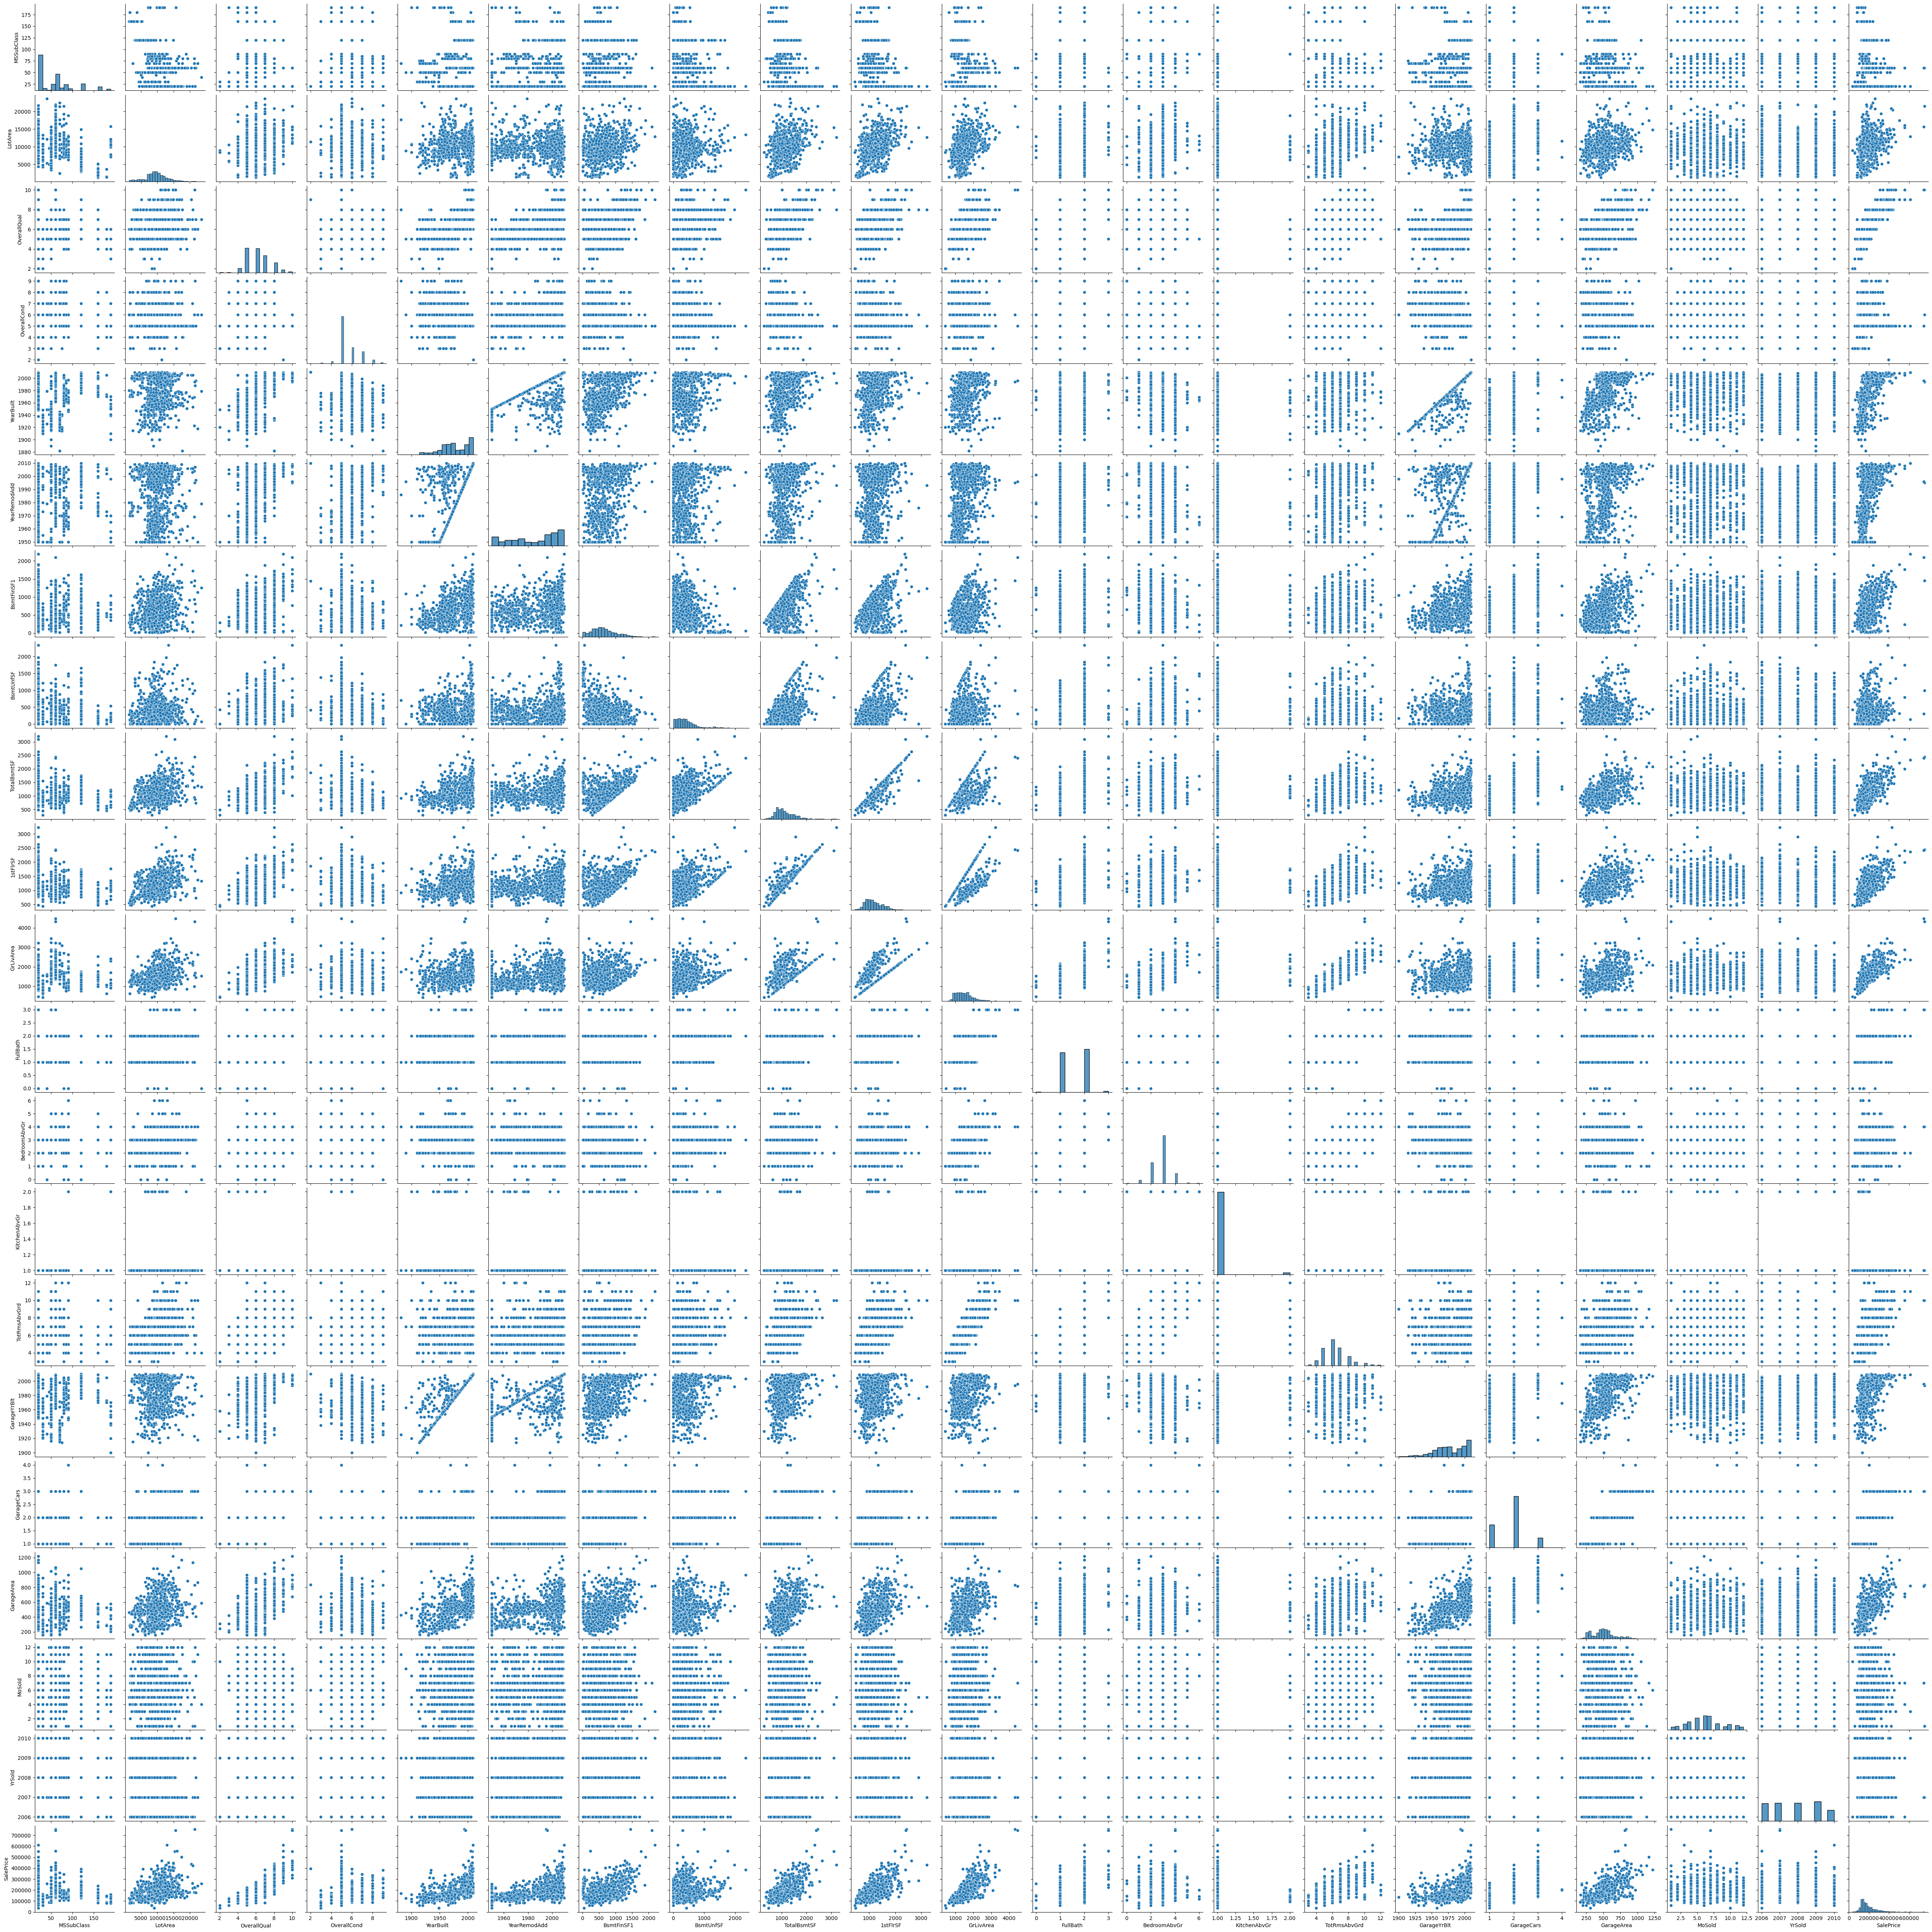

In [70]:
sns.pairplot(df[numeric_cols], kind='scatter')
plt.show()

## Train Test Split with 0.7 and 0.3 data set sizes

In [71]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Standardizing numeric columns for data modelling

In [72]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

from sklearn.preprocessing import scale
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
train_cols = df_train.columns
df_train = pd.DataFrame(scale(df_train))
df_train.columns = train_cols
df_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=209)

In [73]:
test_cols = df_test.columns
df_test = pd.DataFrame(scale(df_test))
df_test.columns = test_cols
df_test.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=209)

In [74]:
#df_train[numeric_cols].describe()

## Get X and y train - test data set

In [75]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [76]:
X_train.shape

(641, 208)

In [77]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [78]:
X_test.shape

(276, 208)

## Feature selection using RFE and build basic linear regression model

In [79]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [80]:
# Running RFE with the output number of the variable equal to 100 and remove 10 features at each step
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=100, step = 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 7),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 5),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('FullBath', False, 5),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 9),
 ('TotRmsAbvGrd', False, 9),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 3),
 ('GarageArea', False, 7),
 ('MoSold', False, 4),
 ('YrSold', False, 8),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 10),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('LotShape_IR2', False, 11),
 ('LotShape_IR3', False, 10),
 ('LotShape_Reg', False, 12),
 ('LandContour_HLS', False, 2),
 ('LandContour_Low', False, 6),
 ('LandContour_Lvl', False, 8),
 ('Utilities_NoSeWa', False, 10),
 ('LotConfig_CulDSac', False, 11),
 ('LotConfig_FR2', False, 2),
 ('LotConfig_FR3', False, 4),
 ('LotConfig_Inside', Fal

In [82]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'GarageYrBlt', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_RRAe',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA',
       'Condition2_RRAe', 'Condition2_RRAn', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv',

In [83]:
len(rfe_col), len(list(X_train.columns))

(100, 208)

In [84]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'YearRemodAdd', 'FullBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
       'MSZoning_RH',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=108)

### Simple Linear Regression output on default featureset

In [85]:
# Print the coefficients and intercept
print("Intercept ", lm.intercept_)
print("Coefficients for ",len(lm.coef_), " features = ", lm.coef_)

Intercept  0.00034298279653054777
Coefficients for  208  features =  [ 1.60572048e-02  7.29520770e-02  1.04991431e-01  1.01048036e-01
  1.72820785e-01  1.69994944e-02  5.83069726e-02 -5.29838280e-02
  2.03133971e-01 -2.50433418e-01  6.88254681e-01 -2.27523761e-02
 -7.82370064e-02  6.33266797e-03 -6.12101922e-03  4.11011750e-02
  2.29768631e-02 -6.36769391e-03 -1.83249571e-02 -6.89756178e-03
 -5.87262200e-02 -2.47692410e-03 -3.01666594e-02 -2.99374756e-02
  2.56925247e+11 -1.50027598e-03  2.81607922e-03 -6.28812274e-04
  1.88942014e-02 -2.20721260e-02 -7.07363354e-03  3.56760447e-03
  1.22299724e-03 -3.09243205e-02 -2.24545296e-02 -1.10385447e-02
  1.64958814e-02  6.92550926e+10  8.53896671e+09  1.65515771e-03
  3.16019291e-02 -3.08838695e-02 -3.87123554e-02  3.70226724e-02
 -4.17208307e-02 -3.33191341e-02  1.18026027e-03 -1.19383606e-03
 -4.83117596e-02 -7.09243669e-02  2.24546291e-02 -3.96899936e-02
  5.55163217e-02  4.05186557e-02 -3.80701259e-02  3.40543610e-02
 -1.86665524e-02 -1.4

In [86]:
#Get R2-Score, Residual Sum of Square and Root Mean Square on the target variable
def r2_score_rss_mse(dataset_type="Train", y_train=None, y_pred_train=None):
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print(dataset_type, " DataSet: R2 Score = ", r2_train_lr)
    metric.append(r2_train_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print(dataset_type, " DataSet: Residual-Sum of Square = ", rss1_lr)
    metric.append(rss1_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print(dataset_type, " DataSet: Mean Square Error = ", mse_train_lr)
    metric.append(mse_train_lr**0.5)
    return metric

### Print Scores from Linear Regression Model on Train and Test target 

In [87]:
y_pred_train = lm.predict(X_train)
metric = r2_score_rss_mse("Train", y_train, y_pred_train)

Train  DataSet: R2 Score =  0.9498197514632117
Train  DataSet: Residual-Sum of Square =  32.16553931208127
Train  DataSet: Mean Square Error =  0.050180248536788256


In [88]:
y_pred_test = lm.predict(X_test)
metric += r2_score_rss_mse("Test", y_test, y_pred_test)

Test  DataSet: R2 Score =  -2.0656325308557135e+23
Test  DataSet: Residual-Sum of Square =  5.701145785161767e+25
Test  DataSet: Mean Square Error =  2.065632530855713e+23


## Regression and Lasso Modelling

#### Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.
### Ridge Regression

In [90]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Ridge Model

In [91]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
print(model_cv.best_params_)

{'alpha': 100}


In [93]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print("Train dataset: Ridge Coefficient = ", ridge.coef_)

Train dataset: Ridge Coefficient =  [-1.04268164e-02  5.97385696e-02  1.23139782e-01  6.70574633e-02
  6.26271576e-02  4.10977924e-02  9.62098826e-02 -1.84661154e-02
  1.02371335e-01  7.76321239e-02  2.17560509e-01  2.48625689e-02
 -4.26731253e-02 -1.02300115e-02  5.57902921e-02  1.62377962e-02
  3.84510439e-02  3.88718289e-02 -1.52592921e-02 -1.84070063e-04
 -7.52880702e-03  2.49949408e-03  7.46303597e-03 -6.94053569e-03
 -3.37872051e-03  2.56612830e-03 -2.47444691e-03 -1.41069804e-02
  1.66744168e-02 -1.81232053e-02 -5.08091485e-03 -1.56338594e-03
  2.45653337e-03 -3.47556453e-02 -1.93411508e-02 -1.91847271e-02
  1.50333686e-02  1.26889763e-03  0.00000000e+00 -2.23808367e-03
  1.60460397e-02 -3.67893926e-03 -1.54471784e-02  4.00811720e-02
 -2.70617689e-02 -2.58290100e-02  5.77843519e-04 -1.25142788e-02
 -3.23086163e-02 -3.78652494e-02  9.96380335e-03 -2.53146265e-02
  9.41606003e-02  5.21014711e-02 -1.75053636e-02  1.00132022e-02
 -5.53393693e-03  2.16611168e-03  2.53807217e-02  4.10

### Print Scores from Ridge Model on Train and Test target 

In [94]:

y_pred_train = ridge.predict(X_train)
metric1 = r2_score_rss_mse("Train", y_train, y_pred_train)

Train  DataSet: R2 Score =  0.9345660589735764
Train  DataSet: Residual-Sum of Square =  41.94315619793757
Train  DataSet: Mean Square Error =  0.06543394102642366


In [95]:
y_pred_test = ridge.predict(X_test)
metric1 += r2_score_rss_mse("Test", y_test, y_pred_test)

Test  DataSet: R2 Score =  0.8879636844993264
Test  DataSet: Residual-Sum of Square =  30.92202307818591
Test  DataSet: Mean Square Error =  0.11203631550067358


### Lasso

In [96]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
print("Lasso model_cv.best_params_ ", model_cv.best_params_)

Lasso model_cv.best_params_  {'alpha': 0.01}


In [98]:
#Fitting Lasso model for alpha = 0.01 and printing coefficients which have been penalised

alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [99]:
print("Lasso coefficeint = ", lasso.coef_)

Lasso coefficeint =  [-1.24204535e-02  5.39585212e-02  1.51531675e-01  8.19634884e-02
  1.27811042e-01  4.07411341e-02  1.03400044e-01 -0.00000000e+00
  8.78372817e-02  0.00000000e+00  4.25179821e-01  0.00000000e+00
 -5.84207696e-02 -7.65579231e-03  0.00000000e+00  0.00000000e+00
  1.16761282e-02  4.39700573e-02 -8.93060784e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.17761020e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -8.36201685e-03
  1.68270437e-02 -1.81760728e-03 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -1.60205830e-02 -9.11194601e-03 -3.81396573e-03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.20479068e-02 -0.00000000e+00  0.00000000e+00  3.80669470e-02
 -1.21293895e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.46365086e-02 -1.49778985e-02  0.00000000e+00 -1.58925044e-02
  8.55176036e-02  5.30457665e-02 -1.34804331e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.90103987e-02  3.36810077e-02
 -1.

### Print Scores from Lasso Model on Train and Test target 

In [100]:
y_pred_train = lasso.predict(X_train)
metric2 = r2_score_rss_mse("Train", y_train, y_pred_train)

Train  DataSet: R2 Score =  0.9338043042379787
Train  DataSet: Residual-Sum of Square =  42.43144098345566
Train  DataSet: Mean Square Error =  0.0661956957620213


In [101]:
y_pred_test = lasso.predict(X_test)
metric2 += r2_score_rss_mse("Test", y_test, y_pred_test)

Test  DataSet: R2 Score =  0.8966244388925779
Test  DataSet: Residual-Sum of Square =  28.531654865648484
Test  DataSet: Mean Square Error =  0.10337556110742205


## Show model data in table

In [106]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','RSS (Train)', 'MSE (Train)', 'R2 Score (Test)', 'RSS (Test)', 'MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression (Alpha = 100)')
ls_metric = pd.Series(metric2, name = 'Lasso Regression (Alpha = 0.01)')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

Metric  Linear Regression  Ridge Regression (Alpha = 100)  \
0  R2 Score (Train)       9.498198e-01                        0.934566   
1       RSS (Train)       3.216554e+01                       41.943156   
2       MSE (Train)       2.240095e-01                        0.255801   
3   R2 Score (Test)      -2.065633e+23                        0.887964   
4        RSS (Test)       5.701146e+25                       30.922023   
5        MSE (Test)       4.544923e+11                        0.334718   

   Lasso Regression (Alpha = 0.01)  
0                         0.933804  
1                        42.431441  
2                         0.257285  
3                         0.896624  
4                        28.531655  
5                         0.321521

## Log observation of the changes in the coefficients after regularization

In [107]:
betas = pd.DataFrame(index=df_train.columns)

In [108]:
betas.rows = df_train.columns

In [109]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [114]:
pd.set_option('display.max_rows', None)
betas.head(210)

Linear     Ridge     Lasso
MSSubClass             1.605720e-02 -0.010427 -0.012420
LotArea                7.295208e-02  0.059739  0.053959
OverallQual            1.049914e-01  0.123140  0.151532
OverallCond            1.010480e-01  0.067057  0.081963
YearBuilt              1.728208e-01  0.062627  0.127811
YearRemodAdd           1.699949e-02  0.041098  0.040741
BsmtFinSF1             5.830697e-02  0.096210  0.103400
BsmtUnfSF             -5.298383e-02 -0.018466 -0.000000
TotalBsmtSF            2.031340e-01  0.102371  0.087837
1stFlrSF              -2.504334e-01  0.077632  0.000000
GrLivArea              6.882547e-01  0.217561  0.425180
FullBath              -2.275238e-02  0.024863  0.000000
BedroomAbvGr          -7.823701e-02 -0.042673 -0.058421
KitchenAbvGr           6.332668e-03 -0.010230 -0.007656
TotRmsAbvGrd          -6.121019e-03  0.055790  0.000000
GarageYrBlt            4.110118e-02  0.016238  0.000000
GarageCars             2.297686e-02  0.038451  0.011676
GarageArea            -6.367694e-03  0.038872  0.043970
MoSold                -1.832496e-02 -0.015259 -0.008931
YrSold                -6.897562e-03 -0.000184  0.000000
MSZoning_FV           -5.872622e-02 -0.007529 -0.000000
MSZoning_RH           -2.476924e-03  0.002499  0.000000
MSZoning_RL           -3.016666e-02  0.007463  0.000000
MSZoning_RM           -2.993748e-02 -0.006941 -0.011776
Street_Pave            2.569252e+11 -0.003379 -0.000000
LotShape_IR2          -1.500276e-03  0.002566  0.000000
LotShape_IR3           2.816079e-03 -0.002474 -0.000000
LotShape_Reg          -6.288123e-04 -0.014107 -0.008362
LandContour_HLS        1.889420e-02  0.016674  0.016827
LandContour_Low       -2.207213e-02 -0.018123 -0.001818
LandContour_Lvl       -7.073634e-03 -0.005081 -0.000000
Utilities_NoSeWa       3.567604e-03 -0.001563 -0.000000
LotConfig_CulDSac      1.222997e-03  0.002457  0.000000
LotConfig_FR2         -3.092432e-02 -0.034756 -0.016021
LotConfig_FR3         -2.245453e-02 -0.019341 -0.009112
LotConfig_Inside      -1.103854e-02 -0.019185 -0.003814
LandSlope_Mod          1.649588e-02  0.015033  0.000000
LandSlope_Sev          6.925509e+10  0.001269 -0.000000
Neighborhood_Blueste   8.538967e+09  0.000000  0.000000
Neighborhood_BrDale    1.655158e-03 -0.002238 -0.000000
Neighborhood_BrkSide   3.160193e-02  0.016046  0.012048
Neighborhood_ClearCr  -3.088387e-02 -0.003679 -0.000000
Neighborhood_CollgCr  -3.871236e-02 -0.015447  0.000000
Neighborhood_Crawfor   3.702267e-02  0.040081  0.038067
Neighborhood_Edwards  -4.172083e-02 -0.027062 -0.012129
Neighborhood_Gilbert  -3.331913e-02 -0.025829 -0.000000
Neighborhood_IDOTRR    1.180260e-03  0.000578  0.000000
Neighborhood_MeadowV  -1.193836e-03 -0.012514 -0.000000
Neighborhood_Mitchel  -4.831176e-02 -0.032309 -0.014637
Neighborhood_NAmes    -7.092437e-02 -0.037865 -0.014978
Neighborhood_NPkVill   2.245463e-02  0.009964  0.000000
Neighborhood_NWAmes   -3.968999e-02 -0.025315 -0.015893
Neighborhood_NoRidge   5.551632e-02  0.094161  0.085518
Neighborhood_NridgHt   4.051866e-02  0.052101  0.053046
Neighborhood_OldTown  -3.807013e-02 -0.017505 -0.013480
Neighborhood_SWISU     3.405436e-02  0.010013  0.000000
Neighborhood_Sawyer   -1.866655e-02 -0.005534  0.000000
Neighborhood_SawyerW  -1.493002e-02  0.002166 -0.000000
Neighborhood_Somerst   4.403795e-02  0.025381  0.019010
Neighborhood_StoneBr   4.713401e-02  0.041019  0.033681
Neighborhood_Timber   -2.154437e-02 -0.017402 -0.001283
Neighborhood_Veenker   2.750519e-03  0.012487  0.000308
Condition1_Feedr      -5.417439e-03  0.000171  0.000000
Condition1_Norm        3.293962e-02  0.034151  0.022645
Condition1_PosA       -1.669461e-02 -0.010747 -0.014644
Condition1_PosN       -1.642801e-03 -0.009167 -0.003638
Condition1_RRAe       -4.281906e-02 -0.031340 -0.019563
Condition1_RRAn        4.850664e-03  0.008585  0.000000
Condition1_RRNe       -1.253888e-03 -0.002496 -0.000000
Condition1_RRNn        6.467034e+10  0.003379  0.000000
Condition2_Feedr      -5.540789e+09  0.000000  0.0000

In [115]:
#data['res'] = 
def plot_scatter(Title="Scatter Plot", y_train=None, y_pred_train=None):
    plt.scatter( y_pred_train , y_train - y_pred_train)
    plt.axhline(y=0, color='r', linestyle=':')
    plt.xlabel("Predictions")
    plt.ylabel("Residual")
    plt.show()

In [116]:
# Distribution of errors
def dist_plot(Title="Normality of error terms/residuals", y_train=None, y_pred_train=None):
    p = sns.distplot(y_train - y_pred_train, kde=True)
    p = plt.title('Normality of error terms/residuals')
    plt.xlabel("Residuals")
    plt.show()

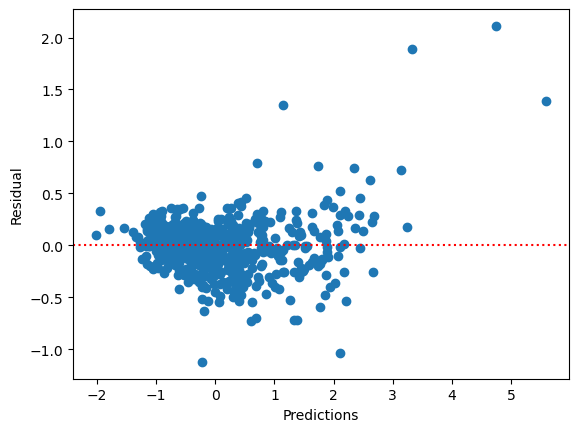

In [117]:
plot_scatter("Train residual Scatter plot", y_train, y_pred_train)

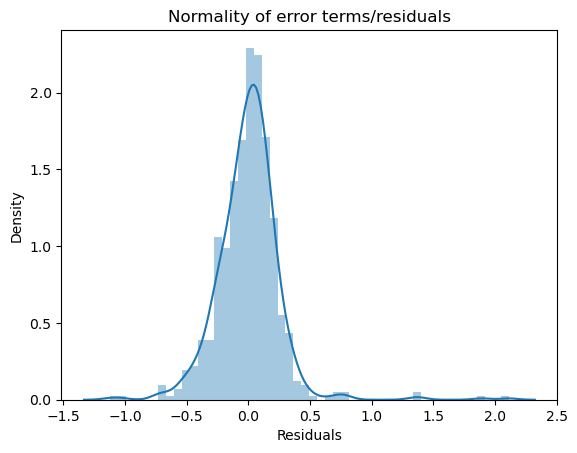

In [118]:
dist_plot("Target variable Error term Distribution plot", y_train, y_pred_train)

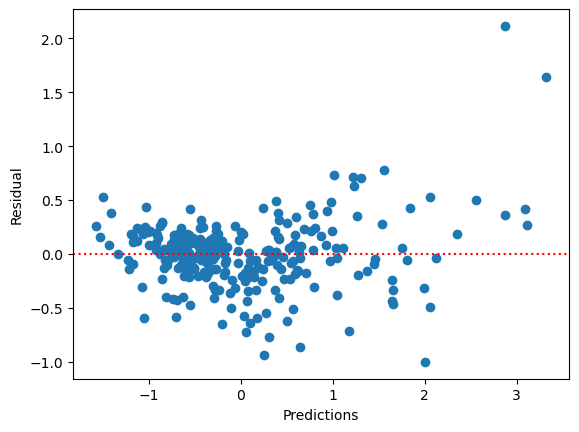

In [119]:
plot_scatter("Test residual Scatter plot", y_test, y_pred_test)

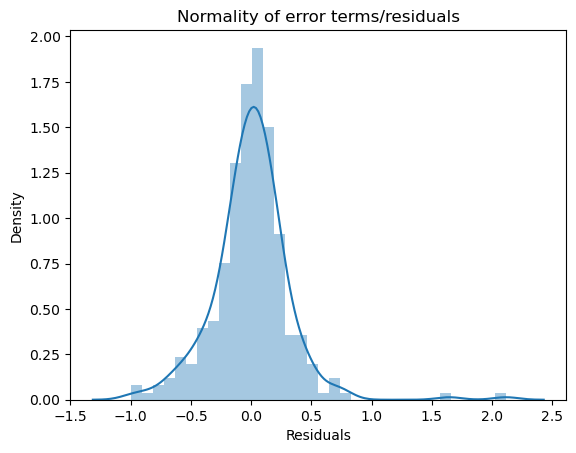

In [120]:
dist_plot("Target variable Error term Distribution plot", y_test, y_pred_test)

## Top 10 Features

In [126]:
get_top_feature = lambda df, col, count: df[col].sort_values(ascending=False).head(count)

In [127]:
get_top_feature(betas,'Linear',10)

ExterQual_Fa           2.716770e+11
Street_Pave            2.569252e+11
GarageCond_TA          1.422642e+11
Exterior2nd_VinylSd    1.189621e+11
GarageCond_Fa          1.097220e+11
Exterior2nd_HdBoard    9.614624e+10
Exterior2nd_MetalSd    9.067065e+10
GarageCond_Gd          8.525924e+10
Exterior2nd_Plywood    8.071764e+10
Exterior2nd_Wd Sdng    8.023341e+10
Name: Linear, dtype: float64

In [128]:
get_top_feature(betas, 'Ridge', 10)

GrLivArea               0.217561
OverallQual             0.123140
TotalBsmtSF             0.102371
BsmtFinSF1              0.096210
Neighborhood_NoRidge    0.094161
1stFlrSF                0.077632
OverallCond             0.067057
RoofMatl_WdShngl        0.063111
YearBuilt               0.062627
LotArea                 0.059739
Name: Ridge, dtype: float64

In [129]:
get_top_feature(betas, 'Lasso', 10)

GrLivArea                0.425180
OverallQual              0.151532
YearBuilt                0.127811
BsmtFinSF1               0.103400
TotalBsmtSF              0.087837
Neighborhood_NoRidge     0.085518
SaleCondition_Partial    0.083110
OverallCond              0.081963
BsmtExposure_Gd          0.056378
LotArea                  0.053959
Name: Lasso, dtype: float64

### Top 10 features from Ridge and Lasso Regression
- GrLivArea, OverallQual, YearBuilt, BsmntFinSF1, TotalBsmtSF, Neighborhood_NoRidge, LotArea, OverallCond

### Double the value of alpha for Ridge and Lasso

## Ridge Model (Double vale of Alpha)

In [130]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
print(ridge_model_cv.best_params_)

{'alpha': 100}


In [133]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 200  ## Double the value of best alpha value
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print("Train dataset: Ridge Coefficient = ", ridge.coef_)

Train dataset: Ridge Coefficient =  [-8.20364774e-03  5.67920672e-02  1.15610035e-01  5.21199373e-02
  4.45487154e-02  4.10712717e-02  9.41673798e-02 -1.41500585e-02
  9.48715951e-02  8.15552227e-02  1.73729972e-01  3.15439026e-02
 -2.88069539e-02 -1.38651151e-02  6.46641418e-02  1.55604382e-02
  4.43292735e-02  4.74667979e-02 -1.44626338e-02  2.37524861e-03
 -3.19515087e-03  2.22563664e-03  9.20401580e-03 -9.08127016e-03
 -2.24468963e-03  2.80146833e-03 -4.40219948e-03 -1.60991215e-02
  1.43089300e-02 -1.52778895e-02 -5.46950170e-03 -3.01404520e-03
  5.62259219e-03 -3.02680950e-02 -1.53340284e-02 -1.74476039e-02
  1.41470687e-02  9.38779474e-04  0.00000000e+00  3.93413888e-05
  1.23462847e-02 -1.60112078e-03 -1.73891354e-02  3.82524387e-02
 -2.38177244e-02 -2.54424573e-02  2.94861116e-04 -1.51455682e-02
 -2.73153201e-02 -3.26561408e-02  5.32769323e-03 -2.16461124e-02
  8.85768385e-02  5.15986594e-02 -1.33750073e-02  5.45897880e-03
 -6.55540174e-03 -7.61261175e-05  1.83015050e-02  3.58

### Print Scores from Ridge Model on Train and Test target 

In [134]:

y_pred_train = ridge.predict(X_train)
metric1 = r2_score_rss_mse("Train", y_train, y_pred_train)

Train  DataSet: R2 Score =  0.9250276179580196
Train  DataSet: Residual-Sum of Square =  48.057296888909455
Train  DataSet: Mean Square Error =  0.07497238204198042


In [135]:
y_pred_test = ridge.predict(X_test)
metric1 += r2_score_rss_mse("Test", y_test, y_pred_test)

Test  DataSet: R2 Score =  0.880928917739604
Test  DataSet: Residual-Sum of Square =  32.86361870386929
Test  DataSet: Mean Square Error =  0.11907108226039599


### Lasso

In [136]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
print("Lasso model_cv.best_params_ ", lasso_model_cv.best_params_)

Lasso model_cv.best_params_  {'alpha': 0.01}


In [138]:
#Fitting Lasso model for alpha = 0.01 and printing coefficients which have been penalised

alpha = 0.02

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.02)

In [139]:
print("Lasso coefficeint = ", lasso.coef_)

Lasso coefficeint =  [-3.47630521e-03  4.49509232e-02  1.98793020e-01  5.24333550e-02
  9.49071587e-02  4.83883832e-02  1.15030706e-01 -0.00000000e+00
  9.89403221e-02  0.00000000e+00  3.94258693e-01  0.00000000e+00
 -4.45851868e-02 -6.14427828e-03  0.00000000e+00  0.00000000e+00
  1.04745394e-02  5.15552990e-02 -2.83807599e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.32508901e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -7.72717381e-03
  7.30577418e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.65307804e-04  0.00000000e+00  0.00000000e+00  3.58331029e-02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -5.21779755e-03
  7.93169698e-02  5.05125243e-02 -2.73661274e-03  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  5.02331469e-03  1.69943719e-02
 -0.

### Print Scores from Lasso Model on Train and Test target 

In [140]:
y_pred_train = lasso.predict(X_train)
metric2 = r2_score_rss_mse("Train", y_train, y_pred_train)

Train  DataSet: R2 Score =  0.9154961260478881
Train  DataSet: Residual-Sum of Square =  54.166983203303744
Train  DataSet: Mean Square Error =  0.08450387395211192


In [141]:
y_pred_test = lasso.predict(X_test)
metric2 += r2_score_rss_mse("Test", y_test, y_pred_test)

Test  DataSet: R2 Score =  0.8841616034327294
Test  DataSet: Residual-Sum of Square =  31.971397452566656
Test  DataSet: Mean Square Error =  0.11583839656727049


In [143]:
len([coef for coef in lasso.coef_ if coef != 0])

53

In [144]:
len([coef for coef in ridge.coef_ if coef != 0])

188